# AMAZON MACHINE LEARNING CHALLENGE 2023 - PRODUCT LENGTH PREDICTION

# THE SHADOW STRIKERS 

IMPORTING LIBRARIES AND DATASET

In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn import utils
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier

CHECKING AND CLEANING THE DATASET

In [2]:
train=pd.read_csv("train.csv")
train.head()

,PRODUCT_ID,TITLE,BULLET_POINTS,DESCRIPTION,PRODUCT_TYPE_ID,PRODUCT_LENGTH
0,1925202,ArtzFolio Tulip Flowers Blackout Curtain for D...,[LUXURIOUS & APPEALING: Beautiful custom-made ...,NaN,1650,2125.980000
1,2673191,Marks & Spencer Girls' Pyjama Sets T86_2561C_N...,"[Harry Potter Hedwig Pyjamas (6-16 Yrs),100% c...",NaN,2755,393.700000
2,2765088,PRIKNIK Horn Red Electric Air Horn Compressor ...,"[Loud Dual Tone Trumpet Horn, Compatible With ...","Specifications: Color: Red, Material: Aluminiu...",7537,748.031495
3,1594019,ALISHAH Women's Cotton Ankle Length Leggings C...,[Made By 95%cotton and 5% Lycra which gives yo...,AISHAH Women's Lycra Cotton Ankel Leggings. Br...,2996,787.401574
4,283658,The United Empire Loyalists: A Chronicle of th...,NaN,NaN,6112,598.424000


In [3]:
train.shape

(2249698, 6)

In [4]:
train.isnull().sum()

PRODUCT_ID               0
TITLE                   12
BULLET_POINTS       837364
DESCRIPTION        1157381
PRODUCT_TYPE_ID          0
PRODUCT_LENGTH           0
dtype: int64

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2249698 entries, 0 to 2249697
Data columns (total 6 columns):
 #   Column           Dtype  
---  ------           -----  
 0   PRODUCT_ID       int64  
 1   TITLE            object 
 2   BULLET_POINTS    object 
 3   DESCRIPTION      object 
 4   PRODUCT_TYPE_ID  int64  
 5   PRODUCT_LENGTH   float64
dtypes: float64(1), int64(2), object(3)
memory usage: 103.0+ MB


In [6]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
PRODUCT_ID,2249698.0,1.499795e+06,8.661944e+05,1.0,749479.500000,1499557.5,2.250664e+06,2.999999e+06
PRODUCT_TYPE_ID,2249698.0,4.000456e+03,3.966146e+03,0.0,230.000000,2916.0,6.403000e+03,1.342000e+04
PRODUCT_LENGTH,2249698.0,4.071839e+03,1.351685e+06,1.0,511.811023,663.0,1.062992e+03,1.885801e+09


In [7]:
test=pd.read_csv("test.csv")
test.head()

,PRODUCT_ID,TITLE,BULLET_POINTS,DESCRIPTION,PRODUCT_TYPE_ID
0,604373,Manuel d'Héliogravure Et de Photogravure En Re...,NaN,NaN,6142
1,1729783,DCGARING Microfiber Throw Blanket Warm Fuzzy P...,[QUALITY GUARANTEED: Luxury cozy plush polyest...,<b>DCGARING Throw Blanket</b><br><br> <b>Size ...,1622
2,1871949,I-Match Auto Parts Front License Plate Bracket...,"[Front License Plate Bracket Made Of Plastic,D...",Replacement for The Following Vehicles:2020 LE...,7540
3,1107571,PinMart Gold Plated Excellence in Service 1 Ye...,[Available as a single item or bulk packed. Se...,Our Excellence in Service Lapel Pins feature a...,12442
4,624253,"Visual Mathematics, Illustrated by the TI-92 a...",NaN,NaN,6318


In [8]:
test.shape

(734736, 5)

In [9]:
test.isnull().sum()

PRODUCT_ID              0
TITLE                   5
BULLET_POINTS      275922
DESCRIPTION        380001
PRODUCT_TYPE_ID         0
dtype: int64

In [10]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 734736 entries, 0 to 734735
Data columns (total 5 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   PRODUCT_ID       734736 non-null  int64 
 1   TITLE            734731 non-null  object
 2   BULLET_POINTS    458814 non-null  object
 3   DESCRIPTION      354735 non-null  object
 4   PRODUCT_TYPE_ID  734736 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 28.0+ MB


In [11]:
test.describe().T

,count,mean,std,min,25%,50%,75%,max
PRODUCT_ID,734736.0,1.493725e+06,866977.258233,0.0,739673.5,1492775.5,2242405.75,2999998.0
PRODUCT_TYPE_ID,734736.0,4.001628e+03,3965.893339,0.0,228.0,2916.0,6396.00,13420.0


DATA VISUALIZATION

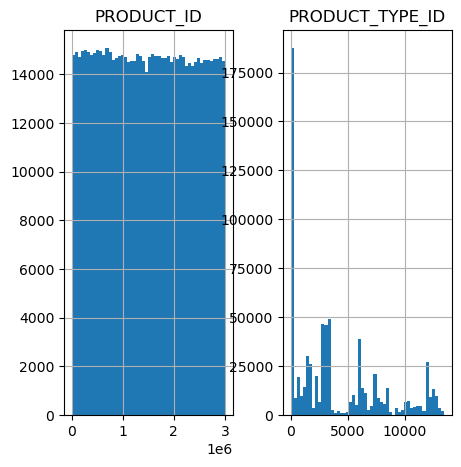

In [12]:
test.hist(figsize=(5,5),bins=50)
plt.show()

<AxesSubplot:>

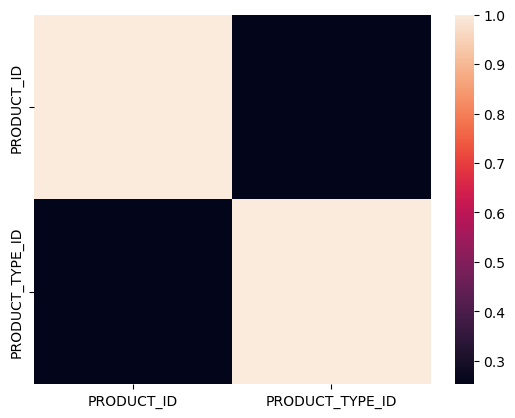

In [13]:
corr = test.corr()
sns.heatmap(corr)

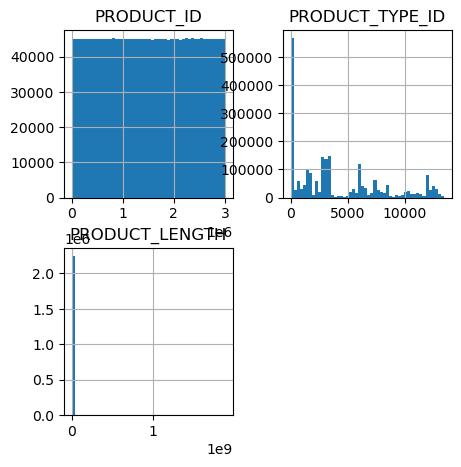

In [14]:
train.hist(figsize=(5,5),bins=50)
plt.show()

<AxesSubplot:>

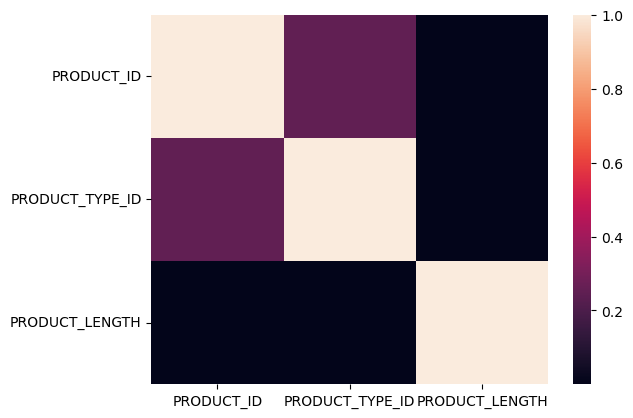

In [15]:
corr = train.corr()
sns.heatmap(corr)

DATA PREPROCESSING AND PREDICTION

In [16]:
train['TITLE'], list1 = pd.factorize(train['TITLE'])
train['BULLET_POINTS'], list2 = pd.factorize(train['BULLET_POINTS'])
train['DESCRIPTION'], list3 = pd.factorize(train['DESCRIPTION'])

In [17]:
train.head()

,PRODUCT_ID,TITLE,BULLET_POINTS,DESCRIPTION,PRODUCT_TYPE_ID,PRODUCT_LENGTH
0,1925202,0,0,-1,1650,2125.980000
1,2673191,1,1,-1,2755,393.700000
2,2765088,2,2,0,7537,748.031495
3,1594019,3,3,1,2996,787.401574
4,283658,4,-1,-1,6112,598.424000


In [18]:
test['TITLE'], list1 = pd.factorize(test['TITLE'])
test['BULLET_POINTS'], list2 = pd.factorize(test['BULLET_POINTS'])
test['DESCRIPTION'], list3 = pd.factorize(test['DESCRIPTION'])

In [19]:
test.head()

,PRODUCT_ID,TITLE,BULLET_POINTS,DESCRIPTION,PRODUCT_TYPE_ID
0,604373,0,-1,-1,6142
1,1729783,1,0,0,1622
2,1871949,2,1,1,7540
3,1107571,3,2,2,12442
4,624253,4,-1,-1,6318


In [20]:
for col_name in train.columns:
        unique_cat = len(train[col_name].unique())
        print("Feature '{col_name}' has {unique_cat} categories".format(col_name=col_name, unique_cat=unique_cat))

print()
print(train['PRODUCT_TYPE_ID'].value_counts().sort_values(ascending=False).head())

Feature 'PRODUCT_ID' has 2249698 categories
Feature 'TITLE' has 2210763 categories
Feature 'BULLET_POINTS' has 965331 categories
Feature 'DESCRIPTION' has 745276 categories
Feature 'PRODUCT_TYPE_ID' has 12907 categories
Feature 'PRODUCT_LENGTH' has 16655 categories

1        121199
12064     57554
0         50505
123       31527
6104      29690
Name: PRODUCT_TYPE_ID, dtype: int64


In [21]:
print('Test set:')
for col_name in test.columns:
        unique_cat = len(test[col_name].unique())
        print("Feature '{col_name}' has {unique_cat} categories".format(col_name=col_name, unique_cat=unique_cat))

print()
print(test['PRODUCT_TYPE_ID'].value_counts().sort_values(ascending=False).head())

Test set:
Feature 'PRODUCT_ID' has 734736 categories
Feature 'TITLE' has 728836 categories
Feature 'BULLET_POINTS' has 355170 categories
Feature 'DESCRIPTION' has 274849 categories
Feature 'PRODUCT_TYPE_ID' has 10565 categories

1        39625
12064    19112
0        16463
123      10427
6104      9999
Name: PRODUCT_TYPE_ID, dtype: int64


In [22]:
product_id = pd.DataFrame(test['PRODUCT_ID'])
product_id

,PRODUCT_ID
0,604373
1,1729783
2,1871949
3,1107571
4,624253
...,...
734731,921419
734732,2456362
734733,841529
734734,1190194


In [23]:
test = test.iloc[:,:]
test

,PRODUCT_ID,TITLE,BULLET_POINTS,DESCRIPTION,PRODUCT_TYPE_ID
0,604373,0,-1,-1,6142
1,1729783,1,0,0,1622
2,1871949,2,1,1,7540
3,1107571,3,2,2,12442
4,624253,4,-1,-1,6318
...,...,...,...,...,...
734731,921419,728830,355167,274844,7073
734732,2456362,728831,-1,-1,1
734733,841529,728832,355168,274845,10645
734734,1190194,728833,18824,274846,12680


In [24]:
x = train.iloc[:, :-1]
y = train.iloc[:,-1]

In [25]:
x

,PRODUCT_ID,TITLE,BULLET_POINTS,DESCRIPTION,PRODUCT_TYPE_ID
0,1925202,0,0,-1,1650
1,2673191,1,1,-1,2755
2,2765088,2,2,0,7537
3,1594019,3,3,1,2996
4,283658,4,-1,-1,6112
...,...,...,...,...,...
2249693,2422167,2210757,15660,-1,3009
2249694,2766635,2210758,965327,745272,3413
2249695,1987786,2210759,965328,745273,1574
2249696,1165754,2210760,-1,-1,592


In [26]:
y

0          2125.980000
1           393.700000
2           748.031495
3           787.401574
4           598.424000
              ...     
2249693    1181.100000
2249694     125.984252
2249695    1200.000000
2249696    2900.000000
2249697    2000.000000
Name: PRODUCT_LENGTH, Length: 2249698, dtype: float64

In [27]:
x_train,x_test,y_train, y_test = train_test_split(x,y,test_size=0.2, random_state = None)

In [28]:
print(utils.multiclass.type_of_target(y_train))
print(utils.multiclass.type_of_target(x_train))
print(utils.multiclass.type_of_target(x_test))
print(utils.multiclass.type_of_target(y_test))

continuous
multiclass-multioutput
multiclass-multioutput
continuous


In [29]:
label_encoder = preprocessing.LabelEncoder()

y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.fit_transform(y_test)

In [30]:
label_encoder = preprocessing.LabelEncoder()
y1 = label_encoder.fit_transform(y)

In [31]:
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=2000)
model.fit(x, y1)

KNeighborsClassifier(n_neighbors=2000)

In [32]:
test1 = test.iloc[:,0:]
test1

,PRODUCT_ID,TITLE,BULLET_POINTS,DESCRIPTION,PRODUCT_TYPE_ID
0,604373,0,-1,-1,6142
1,1729783,1,0,0,1622
2,1871949,2,1,1,7540
3,1107571,3,2,2,12442
4,624253,4,-1,-1,6318
...,...,...,...,...,...
734731,921419,728830,355167,274844,7073
734732,2456362,728831,-1,-1,1
734733,841529,728832,355168,274845,10645
734734,1190194,728833,18824,274846,12680


In [33]:
test_pred = model.predict(test1)

C:\Users\shubh\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [34]:
test_pred.shape

(734736,)

In [35]:
df=pd.DataFrame({'PRODUCT_LENGTH':test_pred})
df.to_csv('submission_file.csv',mode='w+',index=False)

In [36]:
read = pd.read_csv("submission_file.csv")
read

,PRODUCT_LENGTH
0,4719
1,3266
2,4719
3,7669
4,4719
...,...
734731,1133
734732,4719
734733,1133
734734,7669


In [37]:
data=[]
for i in range(0,734736):
    data.append(i)

In [38]:
read.insert(0,'PRODUCT_ID',data)

In [39]:
read.shape

(734736, 2)

In [40]:
read.describe()

,PRODUCT_ID,PRODUCT_LENGTH
count,734736.000000,734736.000000
mean,367367.500000,4425.027180
std,212100.158029,1330.876357
min,0.000000,27.000000
25%,183683.750000,3946.000000
50%,367367.500000,4636.000000
75%,551051.250000,4719.000000
max,734735.000000,7669.000000


In [41]:
read.to_csv('submission_file.csv')